In [1]:
import pandas as pd
import pypowhegparse as ppp
pd.set_option('display.max_columns', None)
folder = "/home/apn/git/POWHEG-BOX-V2/directphotonjj/testrun-lhc/working/"

## Checklimits

In [2]:
ppp.print_stats(folder)
ppp.print_warn_grep(folder,3)



#WARN    =  0
#WWARN   =  0
#WWWARN  =  0
#WWWWARN =  0


## Counters

In [3]:
#ddf = ppp.load_counter_folder(folder)
#ddf.xs("pwgcounters-st4").describe()

In [4]:
#ppp.multi_describe(ddf)#[["real time (sec)"]]

## Stat

In [5]:
ddf = ppp.load_stat_folder(folder)
#ddf.xs("pwg-0001-stat.dat").describe()

In [6]:
ppp.multi_describe(ddf)

proc                btilde pos.   weights:  btilde pos.   weights:+-stat  \
pwg-stat     count               15.000000                     15.000000   
             mean               195.442044                      5.227596   
             std                  6.704554                      2.430122   
             min                186.574504                      3.462723   
             25%                191.619119                      3.953722   
             50%                192.982161                      4.197935   
             75%                196.198736                      5.575468   
             max                211.562759                     12.649198   
pwg-st2-stat count               15.000000                     15.000000   
             mean               195.442044                      5.227596   
             std                  6.704554                      2.430122   
             min                186.574504                      3.462723   
             25%                191.619119                      3.953722   
             50%                192.982161                      4.197935   
             75%                196.198736                      5.575468   
             max                211.562759                     12.649198   

proc                btilde |neg.| weights:  btilde |neg.| weights:+-stat  \
pwg-stat     count                    15.0                          15.0   
             mean                      0.0                           0.0   
             std                       0.0                           0.0   
             min                       0.0                           0.0   
             25%                       0.0                           0.0   
             50%                       0.0                           0.0   
             75%                       0.0                           0.0   
             max                       0.0                           0.0   
pwg-st2-stat count                    15.0                          15.0   
             mean                      0.0                           0.0   
             std                       0.0                           0.0   
             min                       0.0                           0.0   
             25%                       0.0                           0.0   
             50%                       0.0                           0.0   
             75%                       0.0                           0.0   
             max                       0.0                           0.0   

proc                btilde Total (pos.-|neg.|):  \
pwg-stat     count                    15.000000   
             mean                    195.442044   
             std                       6.704554   
             min                     186.574504   
             25%                     191.619119   
             50%                     192.982161   
             75%                     196.198736   
             max                     211.562759   
pwg-st2-stat count                    15.000000   
             mean                    195.442044   
             std                       6.704554   
             min                     186.574504   
             25%                     191.619119   
             50%                     192.982161   
             75%                     196.198736   
             max                     211.562759   

proc                btilde Total (pos.-|neg.|):+-stat  \
pwg-stat     count                          15.000000   
             mean                            5.227596   
             std                             2.430122   
             min                             3.462723   
             25%                             3.953722   
             50%                             4.197935   
             75%                             5.575468   
             max                            12.649198   
pwg-st2-stat count               

## Top

In [7]:
dddf = ppp.load_top_folder(folder)
dddf

title                               pvalue      chi2  \
pwg-btlgrid 12 dim=           1   0.112518  2.518493   
               dim=           2   0.251533  1.314771   
               dim=           3    0.14803  2.092437   
               dim=           4   0.497929  0.459348   
               dim=           5   0.136787  2.213734   
...                                    ...       ...   
            11 dim=           5   0.136787  2.213734   
               dim=           6   0.014439  5.983665   
               dim=           7   0.944043  0.004927   
               dim=           8   0.947156  0.004393   
               dim=           9   0.912808   0.01199   

title                                                                          plot  
pwg-btlgrid 12 dim=           1   <pytopdrawer.topplot.TopPlot object at 0x7fb34...  
               dim=           2   <pytopdrawer.topplot.TopPlot object at 0x7fb34...  
               dim=           3   <pytopdrawer.topplot.TopPlot object at 0x7fb34...  
               dim=           4   <pytopdrawer.topplot.TopPlot object at 0x7fb34...  
               dim=           5   <pytopdrawer.topplot.TopPlot object at 0x7fb34...  
...                                                                             ...  
            11 dim=           5   <pytopdrawer.topplot.TopPlot object at 0x7fb34...  
               dim=           6   <pytopdrawer.topplot.TopPlot object at 0x7fb34...  
               dim=           7   <pytopdrawer.topplot.TopPlot object at 0x7fb34...  
               dim=           8   <pytopdrawer.topplot.TopPlot object at 0x7fb34...  
               dim=           9   <pytopdrawer.topplot.TopPlot object at 0x7fb34...  

[135 rows x 3 columns]

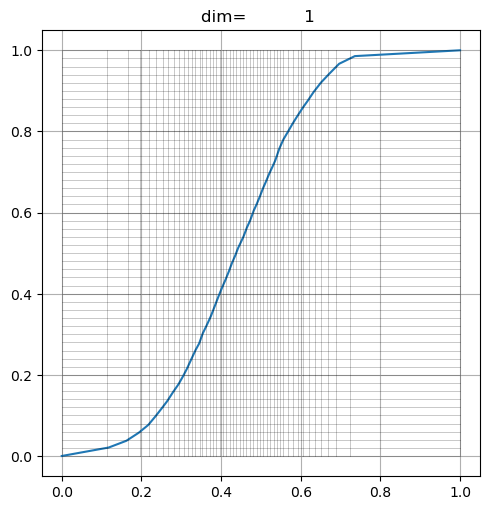

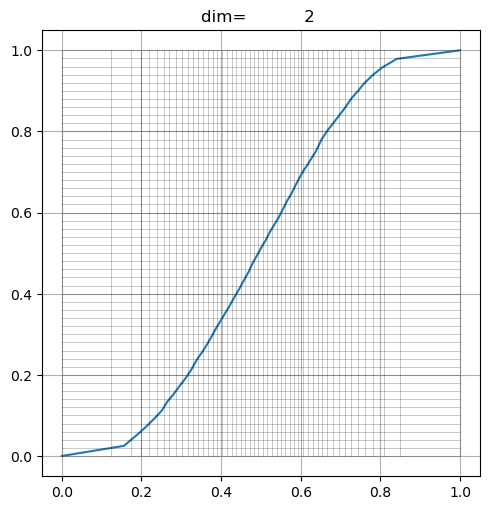

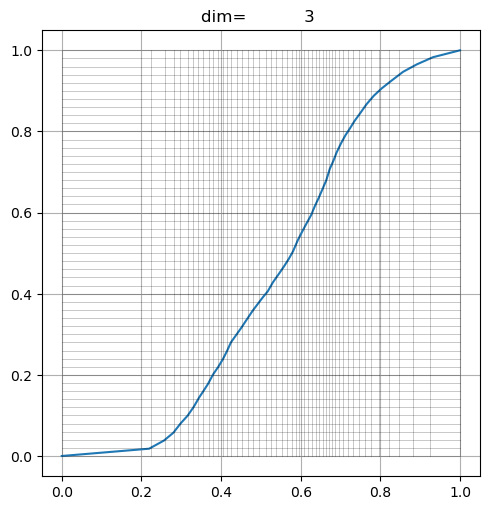

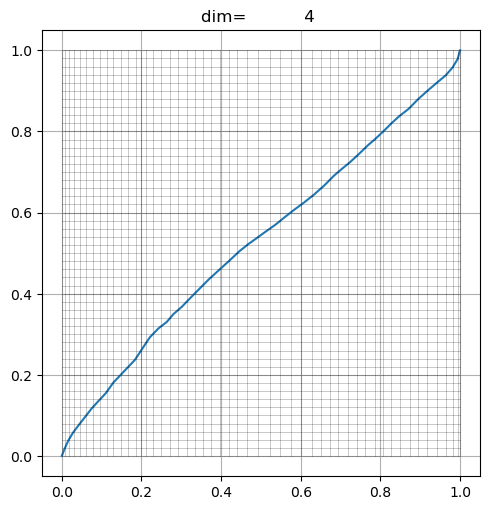

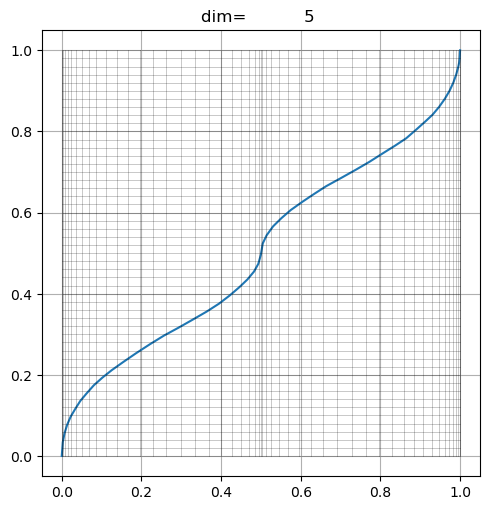

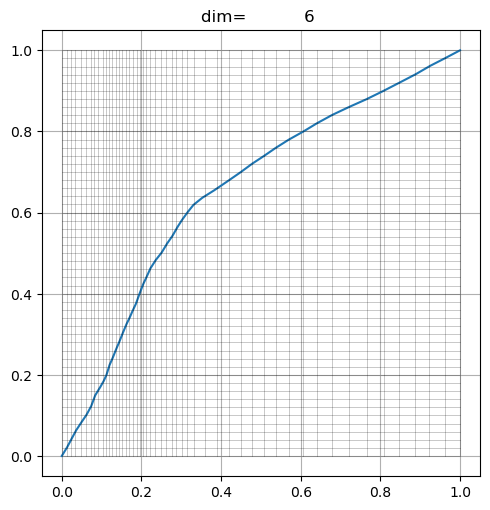

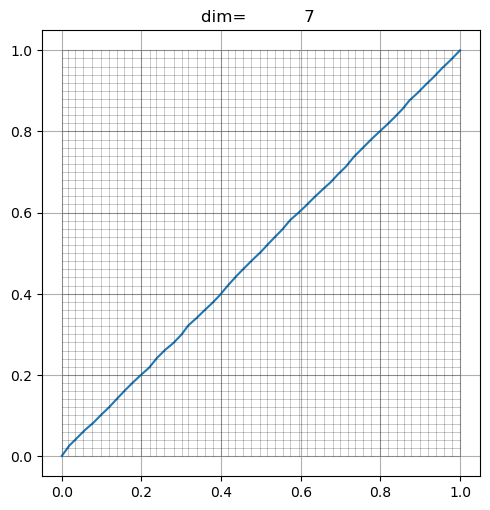

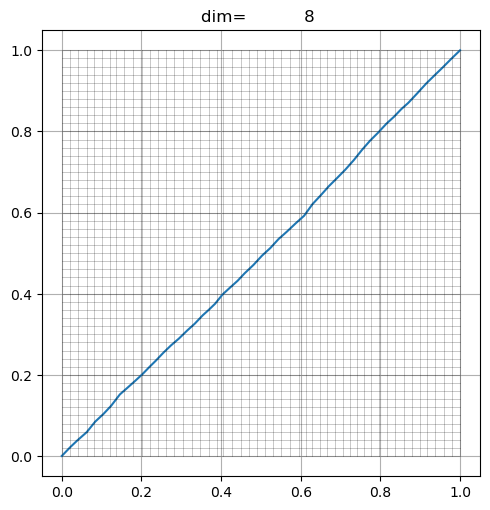

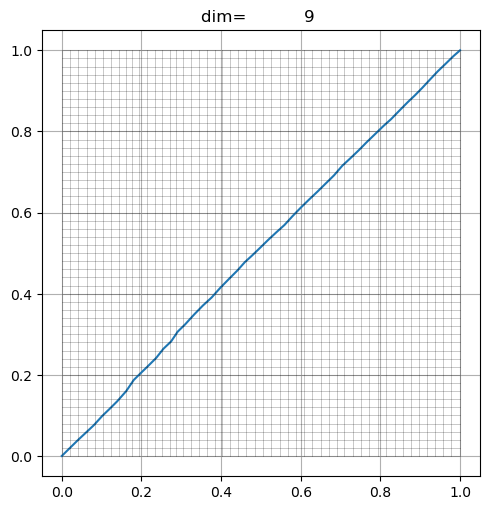

In [8]:
for p in dddf.xs("pwg-btlgrid").xs(1)["plot"]:
    p.show(size=(5,5),fmt="-")
#for p in dddf.xs("pwg-rmngrid").xs(1)["plot"]:
#    p.show(size=(5,5),fmt="-")

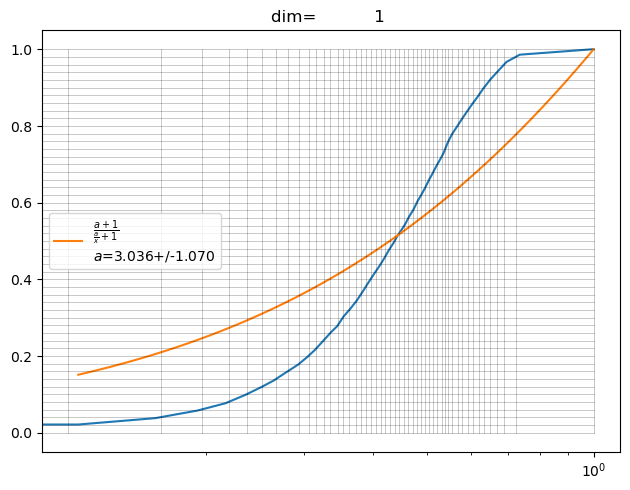

In [9]:
import numpy as np
from uncertainties import unumpy as unp
def fitr(x,a):
    return (a+1)/(a/x+1)
for p in [dddf.xs("pwg-btlgrid").xs(1)["plot"][0]]:
    p.fit(fitr,size=(5,5),fmt="-",logx=True,fselector=lambda x,y : np.logical_and(x>0,x>0) ,extrapolate=False,steps=10000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 62.20it/s]


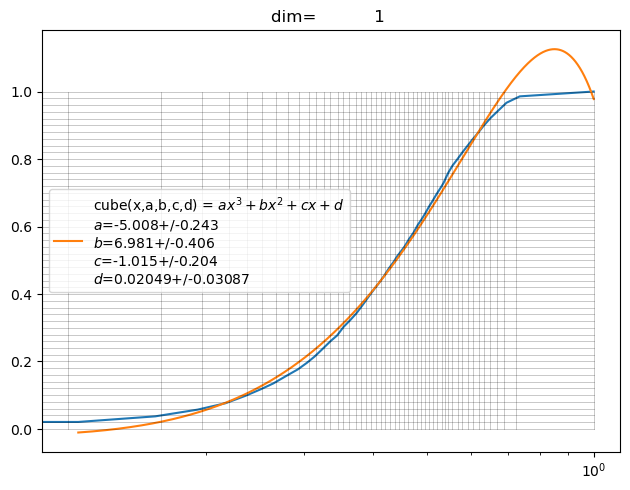

In [10]:

for p in [dddf.xs("pwg-btlgrid").xs(1)["plot"][0]]:
    p.auto(size=(10,10),fmt="-",logx=True,fselector=lambda x,y : x>0,extrapolate=False)

# 